# CODESOFT
    Name: Edupunoor Chitrala Greeshma 
    Batch: Nov Batch A18 
    Role: Data Science


# Task-3 Iris Flowers Classification


# Importing Required Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Loading Data


In [5]:
iris_data = pd.read_csv('iris_data.csv')

In [7]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Preprocessing Data

In [9]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
iris_data.shape

(150, 5)

In [13]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
# to count the unique alues in a particular column

iris_data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [16]:
# missing null values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

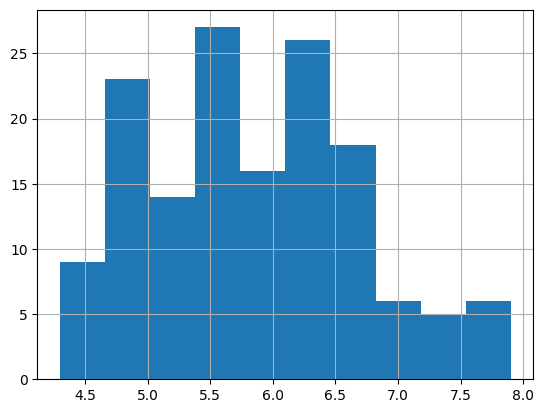

In [19]:
iris_data['sepal_length'].hist()
plt.show()

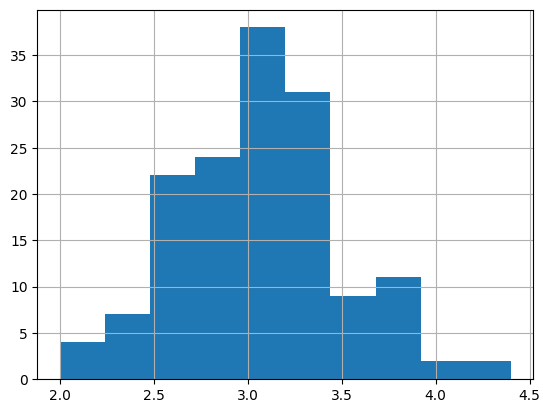

In [20]:
iris_data['sepal_width'].hist()
plt.show()

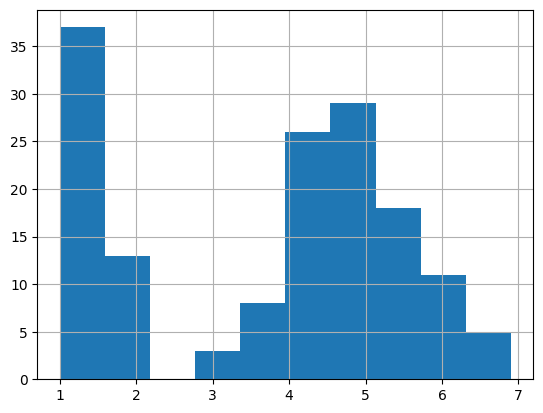

In [21]:
iris_data['petal_length'].hist()
plt.show()

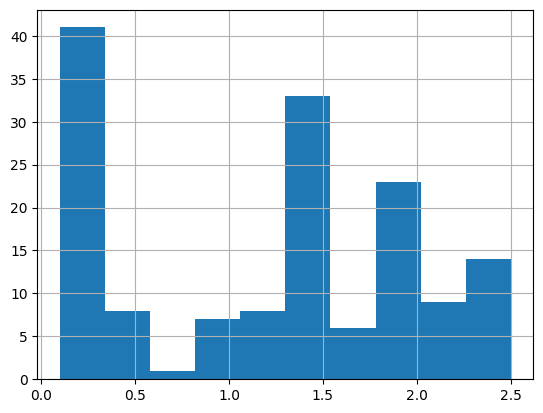

In [22]:
iris_data['petal_width'].hist()
plt.show()

C:\Users\GREESHMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


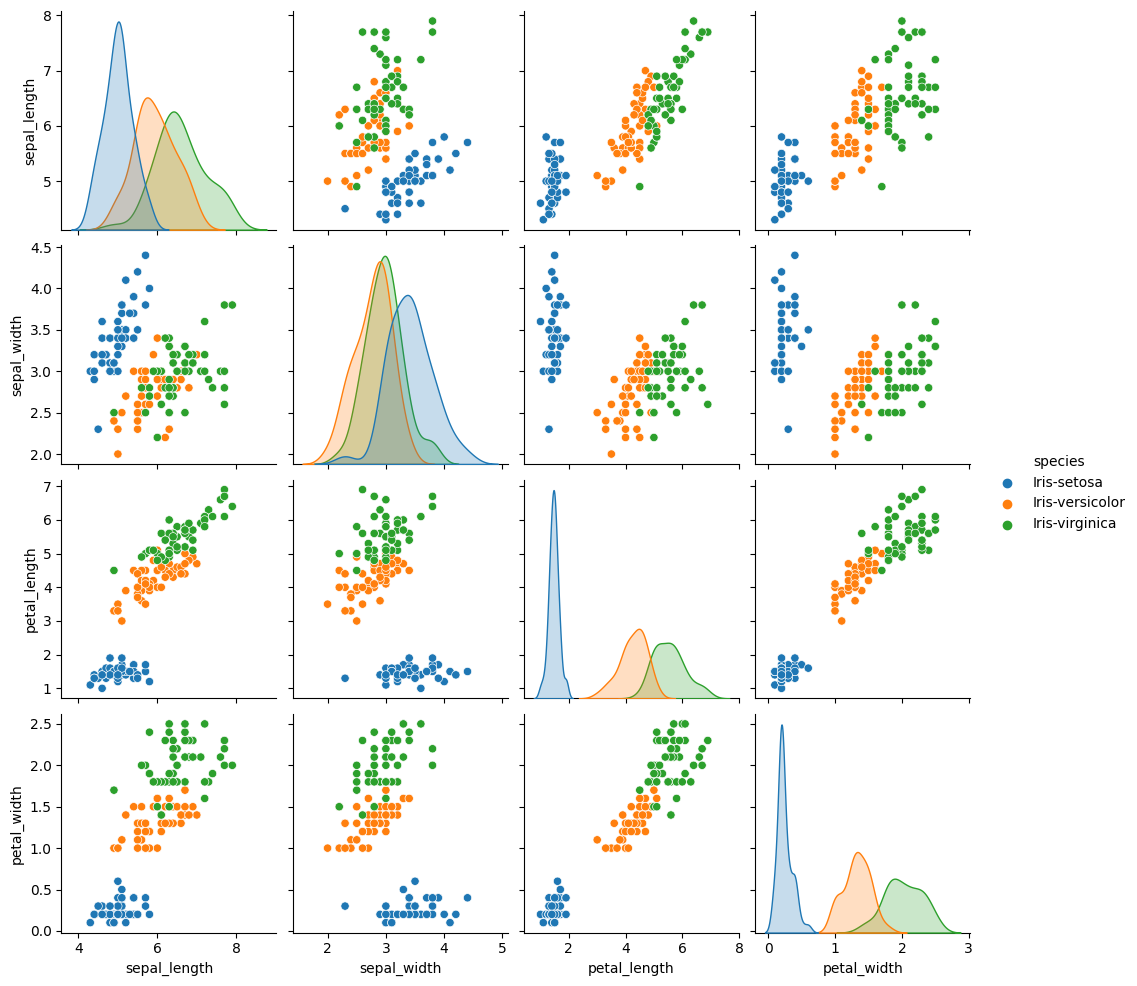

In [23]:
sns.pairplot(iris_data,hue = 'species')
plt.show()

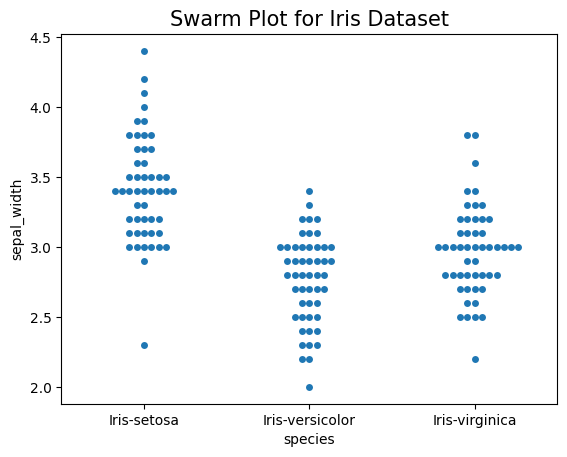

In [24]:
# create a swarmplot

sns.swarmplot(x = 'species' , y = 'sepal_width',data = iris_data)
plt.title('Swarm Plot for Iris Dataset', size=15)
plt.show()

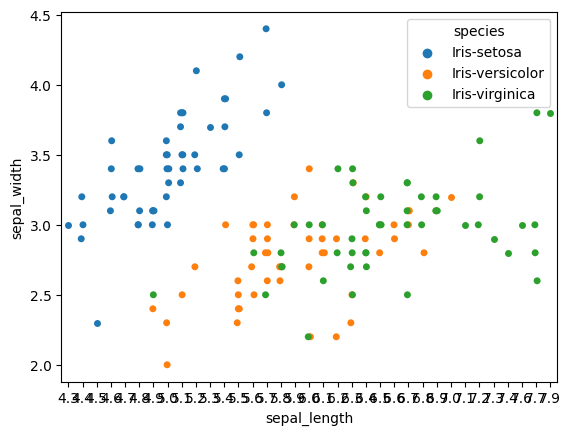

In [25]:
# Create a stripplot

sns.stripplot(x = 'sepal_length',y= 'sepal_width',data = iris_data,jitter=0.1,
            hue='species' )
plt.show()

# Correlation Matrix

In [26]:
iris_data.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


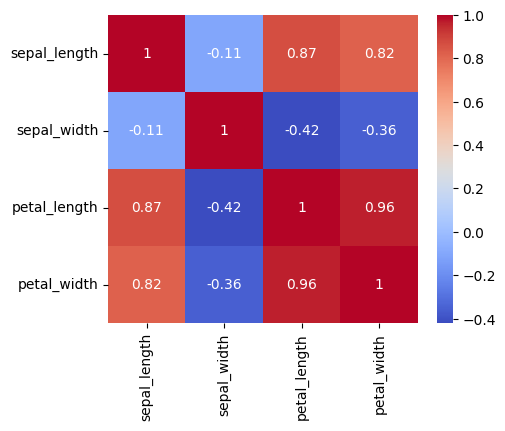

In [27]:
# display the correlation matrix using a heatmap

corr = iris_data.corr(numeric_only = True)
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax = ax,cmap = 'coolwarm')
plt.show()

# Model Selection

In [53]:
# separating features and target variable

Features= iris_data.iloc[ : , 0:4]
target=iris_data.loc[:,'species']

# Model Training

In [54]:
# splitting data inti training data and testing data

X_train,X_test,y_train,y_test = train_test_split(Features,target,test_size=0.2)

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

Standard_obj = StandardScaler() #standarizing model
Standard_obj.fit(X_train) #Training the Model
X_train_std = Standard_obj.transform(X_train)
X_test_std = Standard_obj.transform(X_test)

In [56]:
#Selecting suitable classifier techinque for model(KNN)

knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=7)

# Model Evalution

In [58]:
print('Training data accuracy {:.2f}'.format(knn.score(X_train_std, y_train)*100))
print('Testing data accuracy {:.2f}'.format(knn.score(X_test_std, y_test)*100))

Training data accuracy 96.67
Testing data accuracy 90.00


# Conclusion
Objective: Develop a machine learning model to accurately classify Iris flowers into their respective species using sepal and petal measurements from the Iris dataset. Evaluate the model's performance primarily based on accuracy and choose the best-performing model for this classification task.

# Importing Libraries:

Import necessary Python libraries, including pandas, numpy, seaborn, and matplotlib. Import sklearn libraries for machine learning tasks.

# Loading Data:

Load the Iris dataset using seaborn or other relevant methods. Explore the dataset's structure and sample records.

# Preprocessing the Data:

Check for missing values and handle them, if any. Ensure the dataset is clean and ready for analysis.

# Exploratory Data Analysis:

Visualize data using histograms, stripplot plots, and other relevant plots. Examine the distribution of features and the relationships between them. Understand the characteristics of each Iris species.

# Correlation Matrix:

Create a correlation matrix to analyze relationships between features. Identify any strong correlations that may impact model selection.

# Model Selection:

Choose machine learning models suitable for classification tasks. Common choices include KNN, Logistic Regression, Decision Trees, and Random Forests. used KNN classifier in this model.

# Model Training:

Split the dataset into training and testing sets using train_test_split. Train selected models on the training data.

# Model Evaluation:

The model performance using accuracy, which measures the percentage of correctly classified instances.